### importing tools

In [26]:
import numpy as np
import pandas as pd
#import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### loading data & creating dataframe

In [2]:
dataset_location= r"C:\Users\acer\Downloads\news_dataset.csv"
df=pd.read_csv(dataset_location)

### data exploration

In [3]:
#shape
df.shape

(6335, 4)

In [4]:
#head
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
#tail
df.tail()

,Unnamed: 0,title,text,label
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
Unnamed: 0    6335 non-null int64
title         6335 non-null object
text          6335 non-null object
label         6335 non-null object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [7]:
df.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [8]:
#dropping column 1
df.drop(df.columns[0], axis = 1, inplace = True)

In [9]:
df.shape

(6335, 3)

In [10]:
df.head(n=15)

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [11]:
#checking for null values
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [12]:
#creating a series of the 'label' column
labels=pd.Series(df.label)
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

#### word cloud plot

In [13]:
# creating wordcloud (not original code )
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df.title: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 600, height = 600, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)

In [14]:
comment_words

'you can smell hillary’s fear watch the exact moment paul ryan committed political suicide at a trump rally (video) kerry to go to paris in gesture of sympathy bernie supporters on twitter erupt in anger against the dnc: \'we tried to warn you!\' the battle of new york: why this primary matters tehran, usa girl horrified at what she watches boyfriend do after he left facetime on ‘britain’s schindler’ dies at 106 fact check: trump and clinton at the \'commander-in-chief\' forum iran reportedly makes new push for uranium concessions in nuclear talks with all three clintons in iowa, a glimpse at the fire that has eluded hillary clinton’s campaign donald trump’s shockingly weak delegate game somehow got even worse strong solar storm, tech risks today | s0 news oct.26.2016 [video] 10 ways america is preparing for world war 3 trump takes on cruz, but lightly how women lead differently shocking! michele obama & hillary caught glamorizing date rape promoters hillary clinton in huge trouble aft

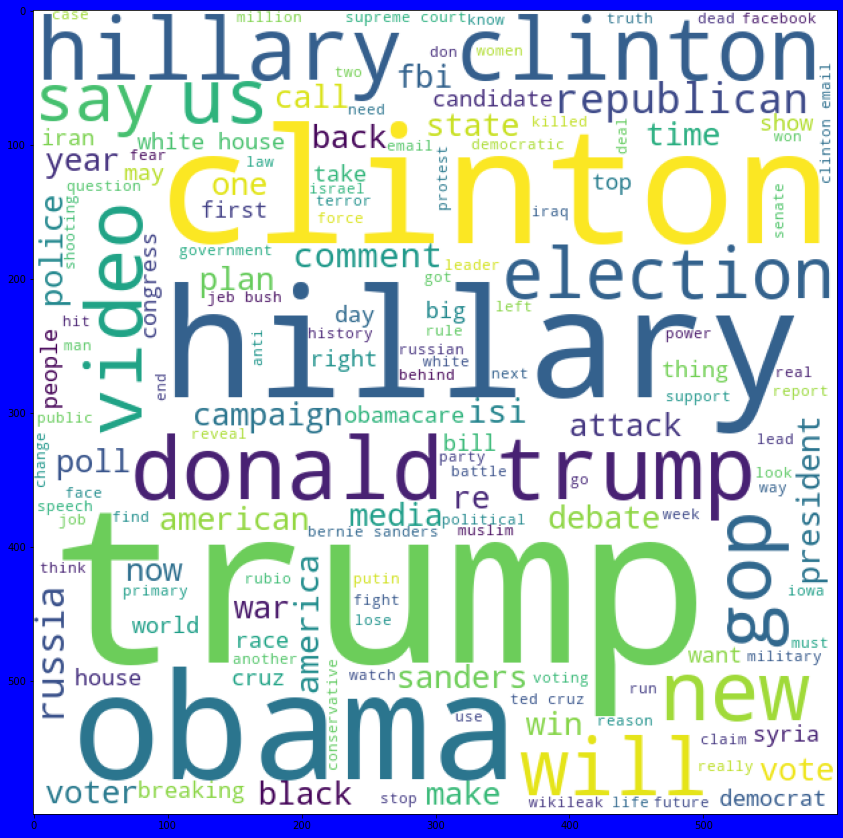

In [15]:
# plotting WordCloud image                        
plt.figure(figsize = (12, 12), facecolor = "blue") 
plt.imshow(wordcloud) 
plt.axis("on") 
plt.tight_layout(pad = 2) 
  
plt.show() 

### modelling with PAC

In [16]:
#Spliting the dataset into training and test sets
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=0)

In [41]:
#TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.75)
#Fitting and transforming train set, transforming test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)
#PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=140)
pac.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=140, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

### prediction

In [43]:
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 93.53%


### confusion matrix

In [19]:
#Confusion matrix
cm=confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
cm

array([[568,  47],
       [ 40, 612]], dtype=int64)

Text(0.5, 24.0, 'Actual')

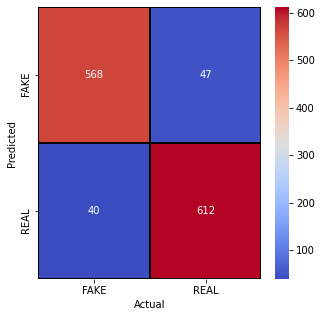

In [20]:
cmdf = pd.DataFrame(cm , index = ['FAKE','REAL'] , columns = ['FAKE','REAL']) #cmdf-conf. matrx dataframe
plt.figure(figsize = (5,5))
sns.heatmap(cmdf,cmap= "coolwarm", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['FAKE','REAL'] , yticklabels = ['FAKE','REAL'])
plt.ylabel("Predicted")
plt.xlabel("Actual")


In [28]:
a=tfidf_train.todense()
a2=tfidf_train.toarray()
b1=tfidf_test.todense()
b2=tfidf_test.toarray()

### naive bayes

In [29]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(a2,y_train) 
  
# making predictions on the testing set 
y_pred = gnb.predict(b2) 
  
# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy(in %):", accuracy_score(y_test, y_pred)*100)


Gaussian Naive Bayes model accuracy(in %): 82.08366219415943


### decision tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(a2,y_train)

#Predict the response for test dataset
y_pred = clf.predict(b2)

In [24]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8492501973164956


### random forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
clf = clf.fit(a2,y_train)

#Predict the response for test dataset
y_pred = clf.predict(b2)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9005524861878453
